# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
dataset = get_dataset("../data/waymo_processed/*.tfrecord")

# dataset = get_dataset("../data/waymo_processed2/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord")


INFO:tensorflow:Reading unweighted datasets: ['../data/waymo_processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['../data/waymo_processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
colors = {1: [1,0,0], 2:[0,1,0], 4: [0,0,1]}

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
        
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    ax.axis('off')
    
    image  = batch['image'].numpy()
    h, w = image.shape[:2]
    
#     h *= h / 1080.0
#     w *= w / 1920.0
    
#     print(h, w)
    
    ax.imshow(image)
    
    boxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    for b, c in zip(boxes, classes):
        y1, x1, y2, x2 = b
        x1 *= w
        x2 *= w
        y1 *= h
        y2 *= h
        
#         print(b)
#         print(y1, x1, y2, x2)
        
        b_w = x2 - x1
        b_h = y2 - y1
        rectangle = Rectangle((x1, y1), b_w, b_h, facecolor="none", edgecolor=colors[c], linewidth=2)
        ax.add_patch(rectangle)
    
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

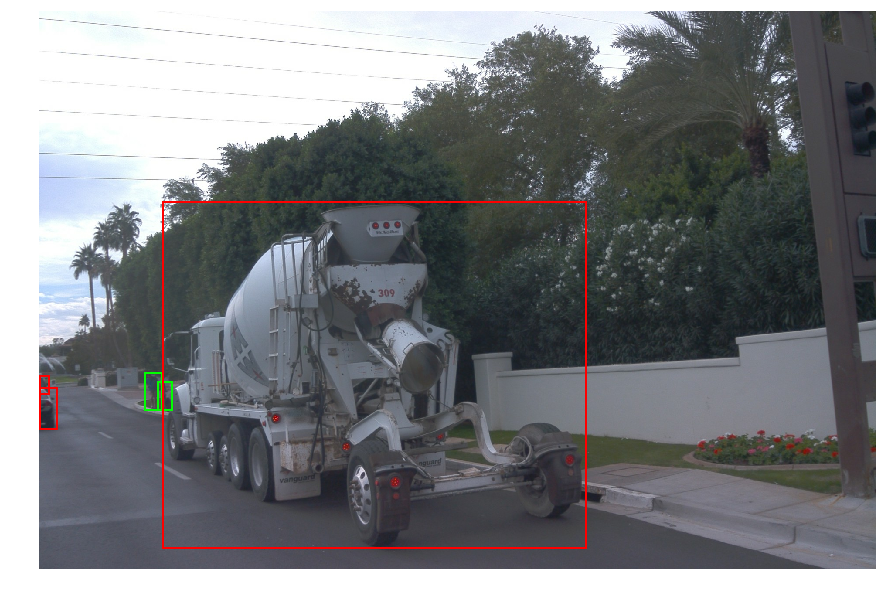

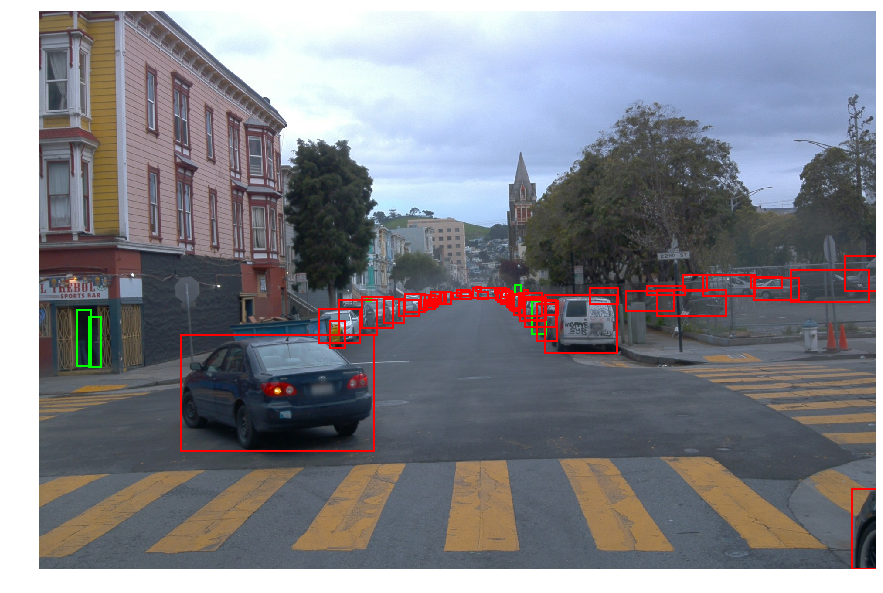

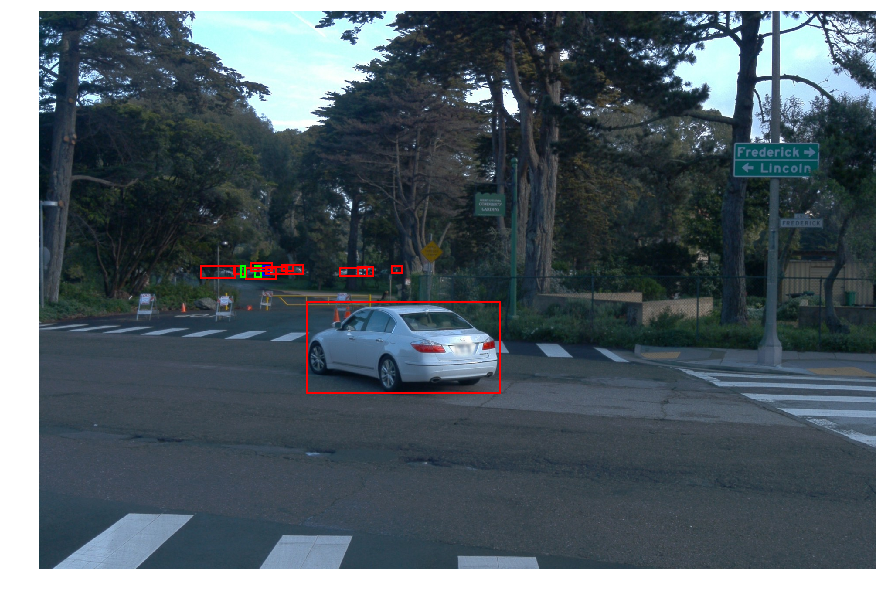

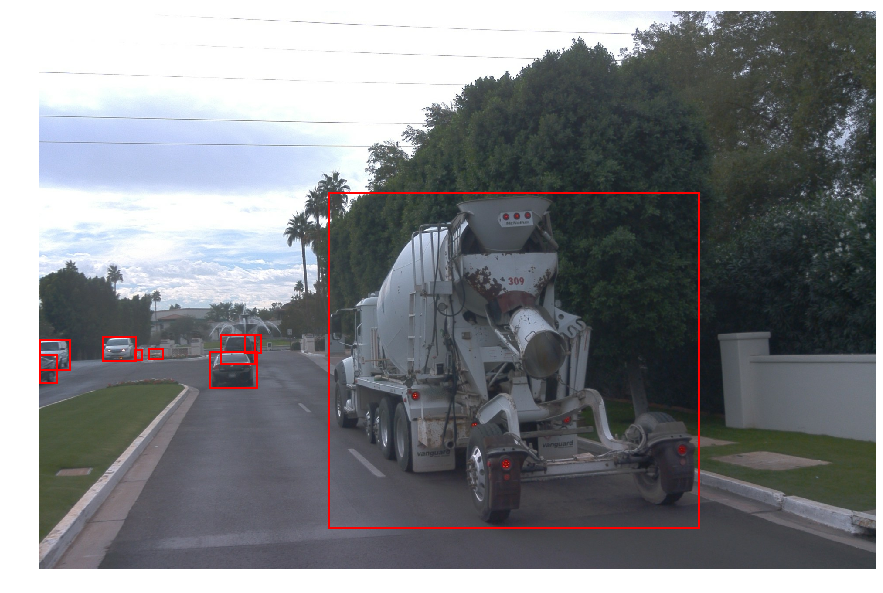

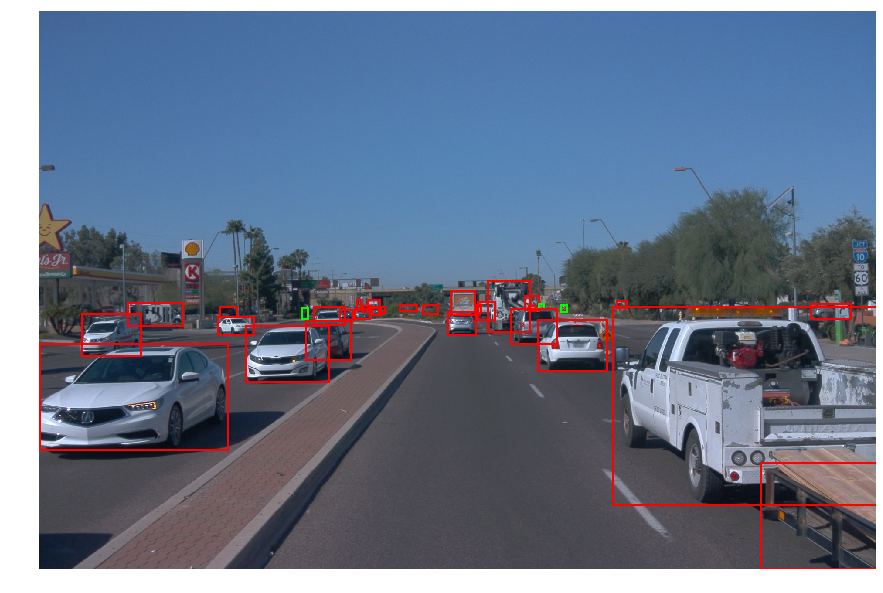

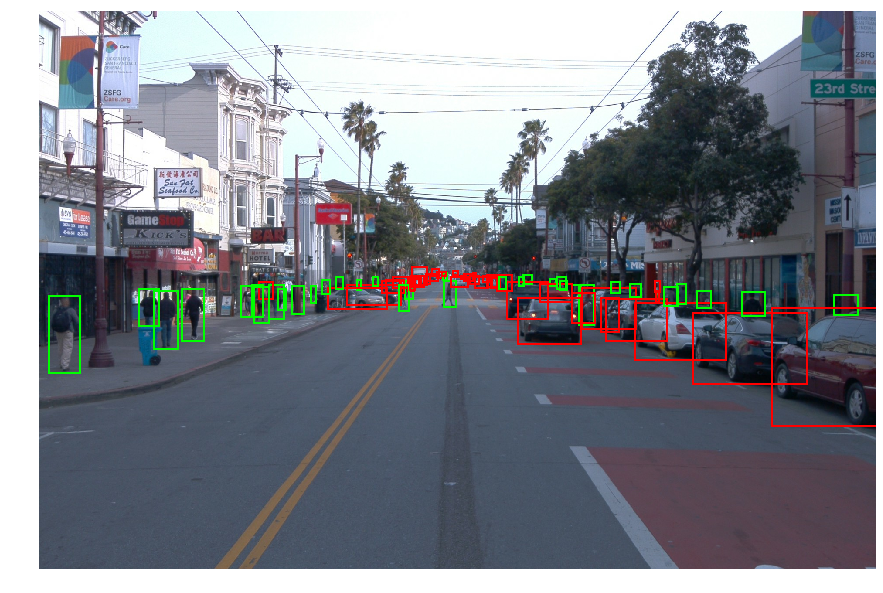

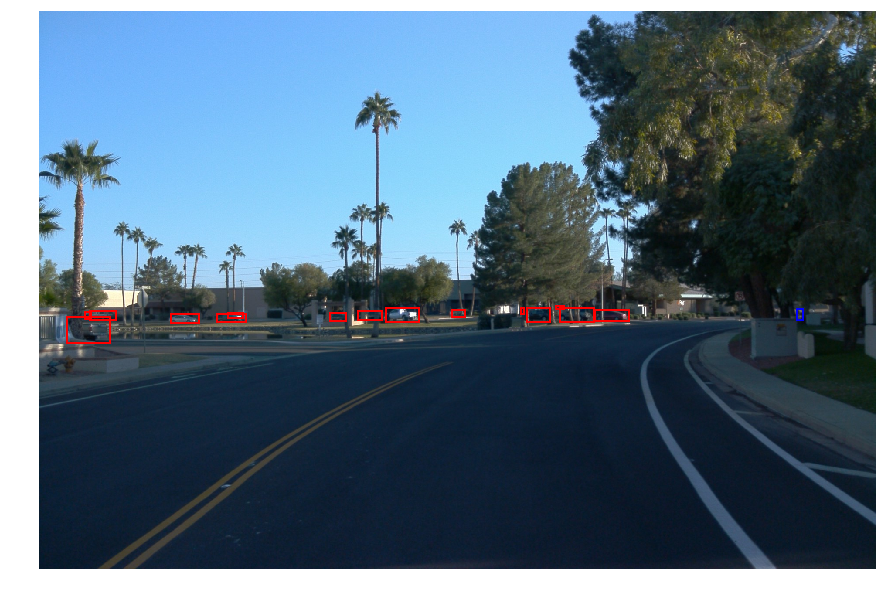

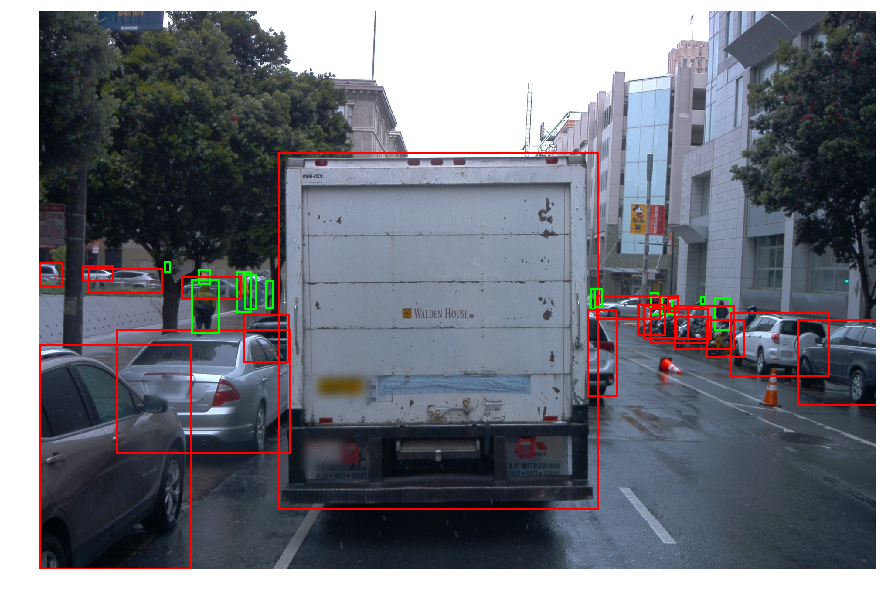

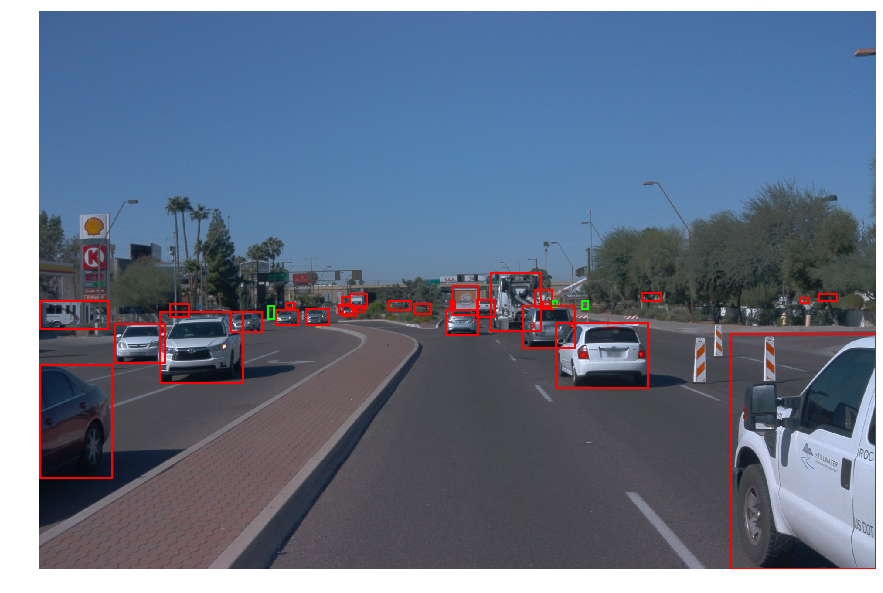

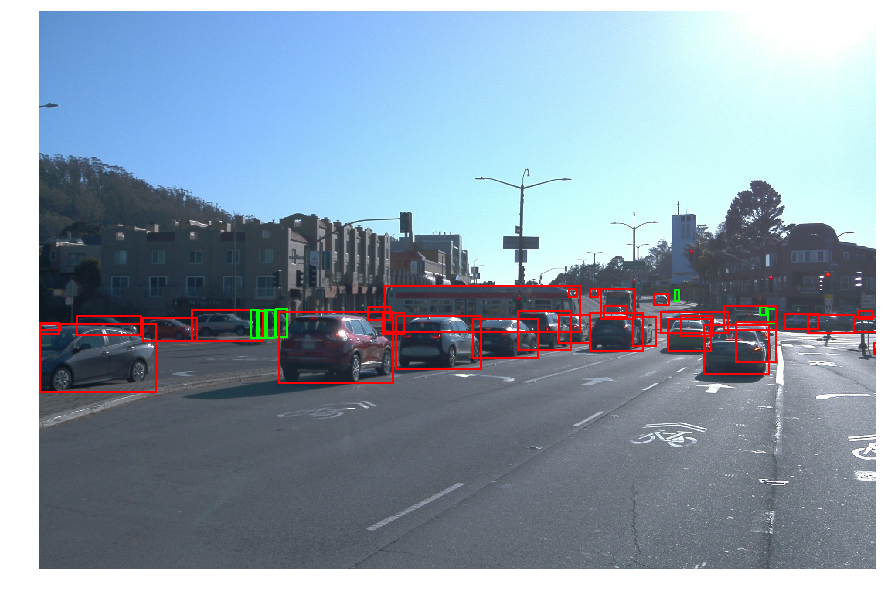

In [4]:
num = 10
for batch in dataset.shuffle(20).take(num):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
# Get the label count distribution

def count_labels(batch):
    classes = batch['groundtruth_classes'].numpy()
    counts = {1: 0, 2: 0, 4: 0}
    for c in classes:
        counts[c] += 1
    return counts

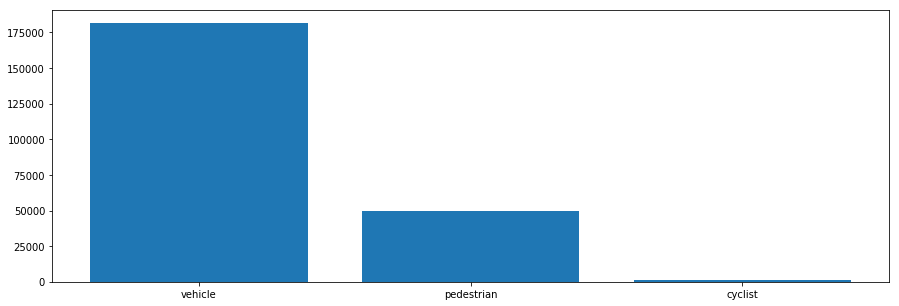

In [6]:
counts = {1: 0, 2: 0, 4: 0}
for batch in dataset.take(10000):
    batch_counts = count_labels(batch)
    for c in counts.keys():
        counts[c] += batch_counts[c]

class_names = {1: 'vehicle', 2: 'pedestrian', 4: 'cyclist'}

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.bar([class_names[k] for k in counts.keys()], [counts[k] for k in counts.keys()])
plt.show()

In [7]:
# Label Bounding box area and aspect ratio

def bbox_shape_stats(batch):    
    image  = batch['image'].numpy()
    h, w = image.shape[:2]
    
    box_aspect_ratios = []
    box_areas = []
    
    boxes = batch['groundtruth_boxes'].numpy()
    for b in boxes:
        y1, x1, y2, x2 = b
        x1 *= w
        x2 *= w
        y1 *= h
        y2 *= h
        
        b_w = x2 - x1
        b_h = y2 - y1
        
        aspect_ratio = float(b_w) / b_h
        area = b_w * b_h
        
        box_aspect_ratios.append(aspect_ratio)
        box_areas.append(area)

    return box_aspect_ratios, box_areas

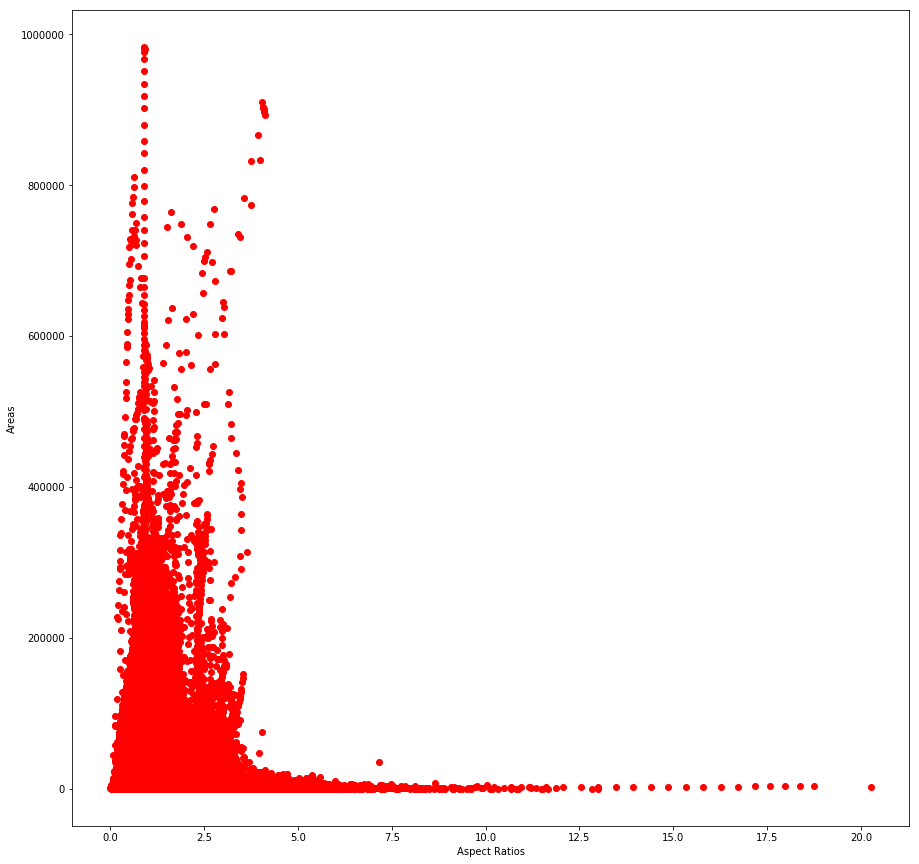

In [8]:
aspect_ratios = []
areas = []
for batch in dataset.take(10000):
    batch_aspect_ratios, batch_areas = bbox_shape_stats(batch)
    aspect_ratios += batch_aspect_ratios
    areas += batch_areas

fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(aspect_ratios, areas, color='r')
ax.set_xlabel('Aspect Ratios')
ax.set_ylabel('Areas')
plt.show()
        